In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

In [112]:
df = pd.read_csv('prediktiv_data.csv')
napercol = df.isna().sum()
print(napercol)

id                0
target            0
feature01         1
feature02         1
feature03         0
feature04         1
feature05         0
feature06         0
feature07         0
feature08         0
feature09         0
feature10         0
feature10.1       0
feature11      2732
feature12      2358
feature13         1
feature14         0
feature15      1422
feature16         0
feature17         0
feature18         0
feature19         0
feature20         0
feature21         0
feature22         0
feature23         0
dtype: int64


In [113]:
#Drop column with many Nan and fill column with one nan 
df.drop(columns=['feature11','feature12','feature15'], axis=1, inplace=True)
df = df.fillna(method='ffill')
df.drop('id',axis=1,inplace=True)

In [114]:
#col_fill = ['feature1','feature2','feature4','feature13']
df

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,feature13,feature14,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
0,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,...,red,2,bad,3,1,5,2010,0,0,1960
1,105000,1.0,730.0,0,882.0,896,5,896,5,6,...,red,0,bad,2,1,6,2010,0,0,1961
2,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,...,red,0,good,3,1,6,2010,1,0,1958
3,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,...,red,2,amazing,3,1,4,2010,1,0,1968
4,189900,2.0,482.0,0,928.0,928,6,1629,5,5,...,red,1,bad,3,1,3,2010,1,701,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,142500,2.0,588.0,0,1003.0,1003,6,1003,6,6,...,red,0,bad,3,1,3,2006,0,0,1984
2926,131000,2.0,484.0,0,864.0,902,5,902,5,5,...,red,0,bad,2,1,6,2006,0,0,1983
2927,132000,0.0,0.0,0,912.0,970,6,970,5,5,...,red,0,bad,3,1,7,2006,0,0,1992
2928,170000,2.0,418.0,0,1389.0,1389,6,1389,5,5,...,red,1,bad,2,1,4,2006,0,0,1975


In [115]:

df.describe()


,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature10.1,feature14,feature17,feature18,feature19,feature20,feature21,feature22,feature23
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,180796.060068,1.766553,472.748464,2.243345,1051.448464,1159.557679,6.443003,1499.690444,6.094881,5.563140,1971.356314,1.566553,0.599317,2.854266,1.044369,6.216041,2007.790444,0.379522,335.455973,1984.266553
std,79886.692357,0.760568,215.044442,35.597181,440.631560,391.890885,1.572964,505.508887,1.411026,1.111537,30.245361,0.552941,0.647921,0.827731,0.214076,2.714492,1.316613,0.502629,428.395715,20.860286
min,12789.000000,0.000000,0.000000,0.000000,0.000000,334.000000,2.000000,334.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,1950.000000
25%,129500.000000,1.000000,320.000000,0.000000,793.000000,876.250000,5.000000,1126.000000,5.000000,5.000000,1954.000000,1.000000,0.000000,2.000000,1.000000,4.000000,2007.000000,0.000000,0.000000,1965.000000
50%,160000.000000,2.000000,480.000000,0.000000,990.000000,1084.000000,6.000000,1442.000000,6.000000,5.000000,1973.000000,2.000000,1.000000,3.000000,1.000000,6.000000,2008.000000,0.000000,0.000000,1993.000000
75%,213500.000000,2.000000,576.000000,0.000000,1301.500000,1384.000000,7.000000,1742.750000,7.000000,6.000000,2001.000000,2.000000,1.000000,3.000000,1.000000,8.000000,2009.000000,1.000000,703.750000,2004.000000
max,755000.000000,5.000000,1488.000000,800.000000,6110.000000,5095.000000,15.000000,5642.000000,10.000000,9.000000,2010.000000,4.000000,4.000000,8.000000,3.000000,12.000000,2010.000000,2.000000,2065.000000,2010.000000


In [116]:
df.shape

(2930, 22)

<AxesSubplot:xlabel='feature21', ylabel='target'>

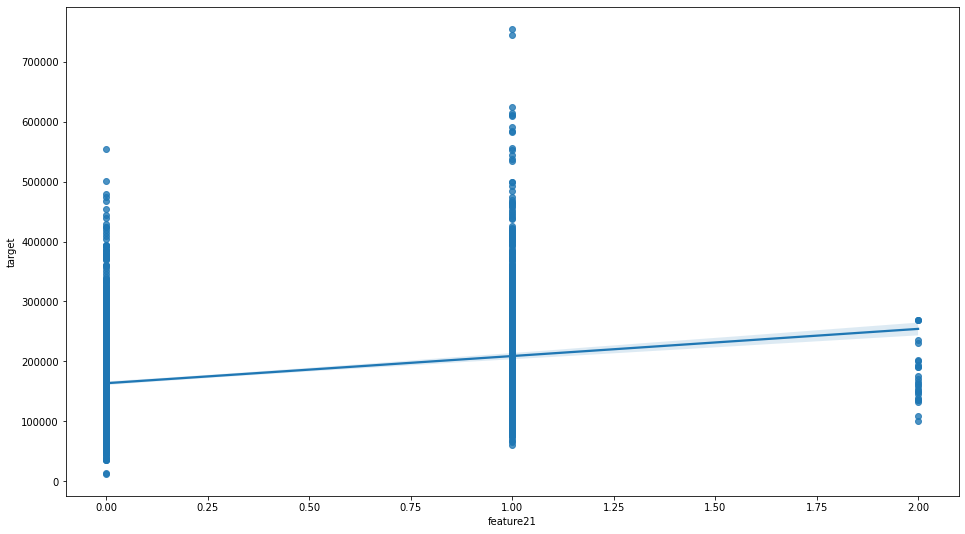

In [117]:
plt.figure(figsize=(16,9))
sns.regplot(x=df.feature21, y=df.target, data=df)

<Figure size 1440x1080 with 0 Axes>

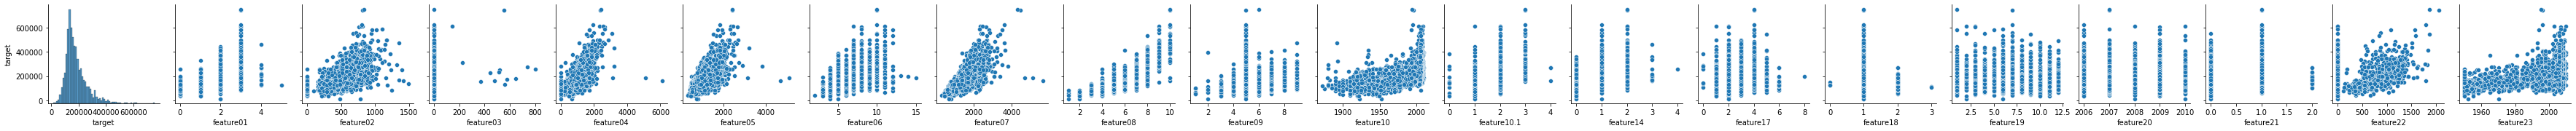

In [118]:
#pair = sns.load_dataset(df)
plt.figure(figsize=(20,15))
sns.pairplot(df,y_vars='target')

In [82]:
print(df['feature13'].unique())
print(df['feature16'].unique())

['red' 'blue' 'green' 'yellow' 'pink']
['bad' 'good' 'amazing' 'okay' 'horrible']


In [83]:
df = pd.concat([df, pd.get_dummies(df['feature13'],prefix='color',drop_first=True)],axis=1)
df = pd.concat([df, pd.get_dummies(df['feature16'],prefix='fealing',drop_first=True)],axis=1)
df.drop(['feature13','feature16'],axis=1, inplace=True)
df

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,feature22,feature23,color_green,color_pink,color_red,color_yellow,fealing_bad,fealing_good,fealing_horrible,fealing_okay
0,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,...,0,1960,0,0,1,0,1,0,0,0
1,105000,1.0,730.0,0,882.0,896,5,896,5,6,...,0,1961,0,0,1,0,1,0,0,0
2,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,...,0,1958,0,0,1,0,0,1,0,0
3,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,...,0,1968,0,0,1,0,0,0,0,0
4,189900,2.0,482.0,0,928.0,928,6,1629,5,5,...,701,1998,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,142500,2.0,588.0,0,1003.0,1003,6,1003,6,6,...,0,1984,0,0,1,0,1,0,0,0
2926,131000,2.0,484.0,0,864.0,902,5,902,5,5,...,0,1983,0,0,1,0,1,0,0,0
2927,132000,0.0,0.0,0,912.0,970,6,970,5,5,...,0,1992,0,0,1,0,1,0,0,0
2928,170000,2.0,418.0,0,1389.0,1389,6,1389,5,5,...,0,1975,0,0,1,0,1,0,0,0


In [84]:
df

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,feature22,feature23,color_green,color_pink,color_red,color_yellow,fealing_bad,fealing_good,fealing_horrible,fealing_okay
0,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,...,0,1960,0,0,1,0,1,0,0,0
1,105000,1.0,730.0,0,882.0,896,5,896,5,6,...,0,1961,0,0,1,0,1,0,0,0
2,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,...,0,1958,0,0,1,0,0,1,0,0
3,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,...,0,1968,0,0,1,0,0,0,0,0
4,189900,2.0,482.0,0,928.0,928,6,1629,5,5,...,701,1998,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,142500,2.0,588.0,0,1003.0,1003,6,1003,6,6,...,0,1984,0,0,1,0,1,0,0,0
2926,131000,2.0,484.0,0,864.0,902,5,902,5,5,...,0,1983,0,0,1,0,1,0,0,0
2927,132000,0.0,0.0,0,912.0,970,6,970,5,5,...,0,1992,0,0,1,0,1,0,0,0
2928,170000,2.0,418.0,0,1389.0,1389,6,1389,5,5,...,0,1975,0,0,1,0,1,0,0,0


#Train and test sets
x = df[features]
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random=123)

In [93]:
#Getting train and test sets
robust_scaler = RobustScaler()
y = df['target']
x = df.drop('target', axis=1)
x = robust_scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
x

array([[ 0.       ,  0.1875   ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [-1.       ,  0.9765625,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [-1.       , -0.65625  ,  0.       , ...,  1.       ,  0.       ,
         0.       ],
       ...,
       [-2.       , -1.875    ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       , -0.2421875,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 1.       ,  0.6640625,  0.       , ...,  0.       ,  0.       ,
         0.       ]])

In [101]:
#Testsets
utvard = pd.DataFrame(index=['train_df', 'test_df'],
            columns=['Null', 'MLR', 'KNN', 'LASSO'])
            

In [104]:
#Null model
y_pred_null = y_train.mean()
utvard.loc['train_df','Null'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_train.size), y_true=y_train)
utvard.loc['test_df','Null'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test)

In [105]:
# Multiple Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
utvard.loc['train_df','MLR'] = mean_squared_error(y_pred=linear_regression.predict(x_train),y_true=y_train)
utvard.loc['test_df','MLR'] = mean_squared_error(y_pred=linear_regression.predict(x_test),y_true=y_test)

In [106]:
# 1. Import the estimator object (model)
from sklearn.neighbors import KNeighborsRegressor
# 2. Create an instance of the estimator
knn = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='euclidean', n_jobs=-1)
# 3. Use the trainning data to train the estimator
knn.fit(x_train, y_train)
# 4. Evaluate the model
utvard.loc['train_df','KNN'] = mean_squared_error(y_pred=knn.predict(x_train), 
                                                    y_true=y_train)

utvard.loc['test_df','KNN'] = mean_squared_error(y_pred=knn.predict(x_test), 
                                                   y_true=y_test)

In [108]:
# 1. Import the estimator object (model)
from sklearn.linear_model import Lasso
# 2. Create an instance of the estimator
lasso = Lasso(alpha=0.2,max_iter=10000)
# 3. Use the trainning data to train the estimator
lasso.fit(x_train, y_train)
# 4. Evaluate the model
utvard.loc['train_df','LASSO'] = mean_squared_error(y_pred=lasso.predict(x_train), 
                                                    y_true=y_train)

utvard.loc['test_df','LASSO'] = mean_squared_error(y_pred=lasso.predict(x_test), 
                                                   y_true=y_test)

In [109]:
utvard

,Null,MLR,KNN,LASSO
train_df,6595832874.369876,1153315842.956825,70006.034343,1153316080.038365
test_df,5530577558.421968,737751601.981049,773478378.429778,737724145.307579


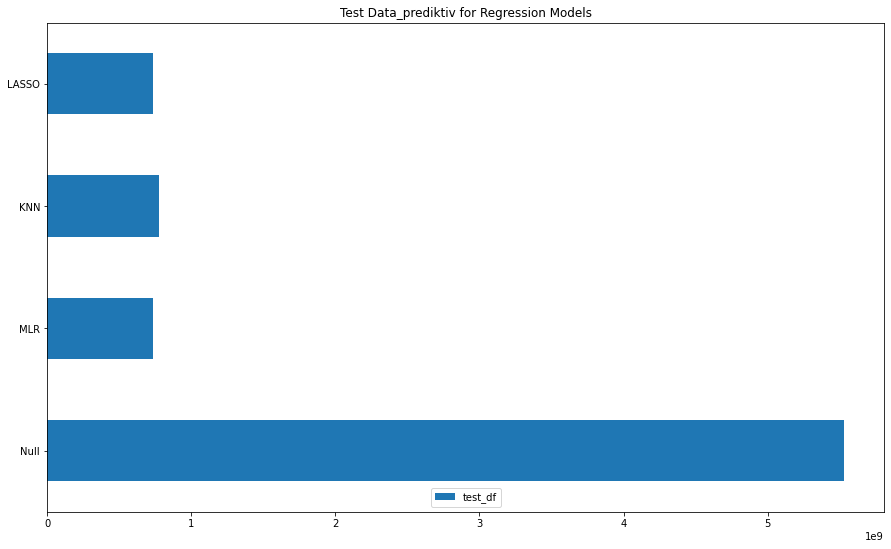

In [111]:
fig, ax = plt.subplots(figsize=(15,9))
utvard.loc['test_df'].plot(kind='barh', ax=ax)
ax.set_title('Test Data_prediktiv for Regression Models')
ax.legend(loc=8, ncol=4);